In [1]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv('../data.csv', index_col=0)
df = df.sort_index()
df.tail()

,K,mag,filename
984,28.237,0.076254,IC984K2.8237e+01mag7.6254e-02.bin
986,201.970,0.052832,IC986K2.0197e+02mag5.2832e-02.bin
990,914.570,0.006452,IC990K9.1457e+02mag6.4517e-03.bin
995,53.041,0.903496,IC995K5.3041e+01mag9.0350e-01.bin
997,77.841,0.530969,IC997K7.7841e+01mag5.3097e-01.bin


In [9]:
df['tmax'] = 5e6
df.loc[:65,'tmax'] = 5e7 # first 24 simulations run to 5e7
df.head(25)

,K,mag,filename,tmax
0,125.210,0.139820,IC0K1.2521e+02mag1.3982e-01.bin,50000000.0
2,74.471,0.001196,IC2K7.4471e+01mag1.1961e-03.bin,50000000.0
4,859.130,0.043822,IC4K8.5913e+02mag4.3822e-02.bin,50000000.0
6,610.550,0.009907,IC6K6.1055e+02mag9.9069e-03.bin,50000000.0
7,14.211,0.218653,IC7K1.4211e+01mag2.1865e-01.bin,50000000.0
8,558.290,0.804678,IC8K5.5829e+02mag8.0468e-01.bin,50000000.0
10,348.850,0.001154,IC10K3.4885e+02mag1.1541e-03.bin,50000000.0
13,359.260,0.005160,IC13K3.5926e+02mag5.1597e-03.bin,50000000.0
15,498.470,0.003441,IC15K4.9847e+02mag3.4410e-03.bin,50000000.0
16,27.963,0.037110,IC16K2.7963e+01mag3.7110e-02.bin,50000000.0


In [10]:
import rebound
icpath = '/scratch/dtamayo/selectic/data/'
df['tinstability'] = df.apply(lambda x: rebound.Simulation.from_archive(icpath+x['filename']).t, axis=1)
df.tail()

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulation.py:374: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulation.py:374: RuntimeWarning: Unknown field found in binary file.
  warnings.warn(message, RuntimeWarning)


,K,mag,filename,tmax,tinstability
984,28.237,0.076254,IC984K2.8237e+01mag7.6254e-02.bin,5000000.0,5000000.0
986,201.970,0.052832,IC986K2.0197e+02mag5.2832e-02.bin,5000000.0,5000000.0
990,914.570,0.006452,IC990K9.1457e+02mag6.4517e-03.bin,5000000.0,5000000.0
995,53.041,0.903496,IC995K5.3041e+01mag9.0350e-01.bin,5000000.0,5000000.0
997,77.841,0.530969,IC997K7.7841e+01mag5.3097e-01.bin,5000000.0,5000000.0


In [11]:
df.to_csv('../datatmax.csv', encoding='ascii')

In [5]:
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re

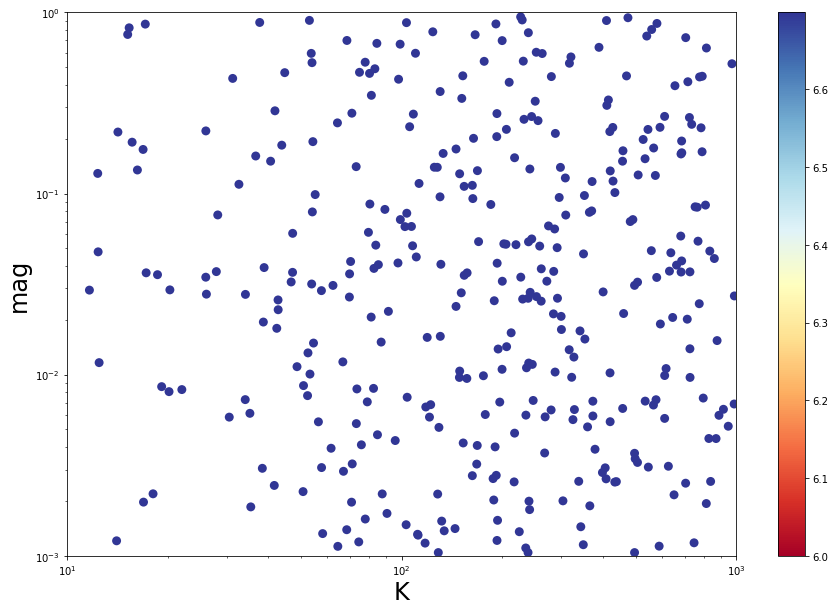

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(df['K'], df['mag'], c=np.log10(df['tinstability_notides']), edgecolor='', vmin=6, vmax=np.log10(5e6), s=80,cmap=cm)        
ax.set_xlabel('K', fontsize=24)
ax.set_ylabel('mag', fontsize=24)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10,1000])
ax.set_ylim([1.e-3, 1])
plt.colorbar(sc)

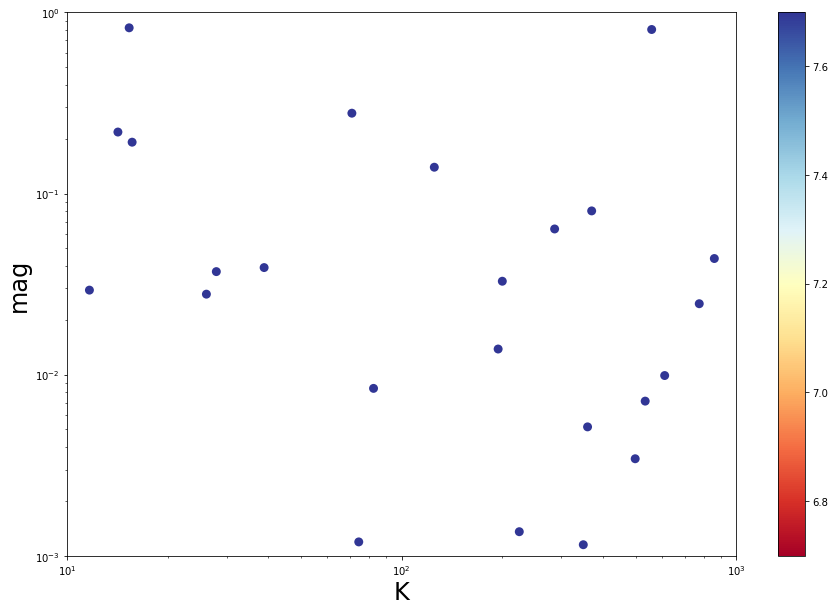

In [7]:
lastsimid = 65
df5e7 = df.loc[0:lastsimid]
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(df5e7['K'], df5e7['mag'], c=np.log10(df5e7['tinstability_notides']), edgecolor='', vmin=np.log10(5e6), vmax=np.log10(5e7), s=80,cmap=cm)        
ax.set_xlabel('K', fontsize=24)
ax.set_ylabel('mag', fontsize=24)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10,1000])
ax.set_ylim([1.e-3, 1])
plt.colorbar(sc)